In [1]:
import pandas as pd
import numpy as np
from glob import glob
import os
import shutil
from matplotlib import pyplot as plt
import cv2

In [2]:
images_path = glob('neoDataSet1/imageData/*.png')

In [3]:
images_path

['neoDataSet1/imageData\\00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_0.png',
 'neoDataSet1/imageData\\00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_1.png',
 'neoDataSet1/imageData\\00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_10.png',
 'neoDataSet1/imageData\\00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_11.png',
 'neoDataSet1/imageData\\00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_2.png',
 'neoDataSet1/imageData\\00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_3.png',
 'neoDataSet1/imageData\\00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_4.png',
 'neoDataSet1/imageData\\00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_5.png',
 'neoDataSet1/imageData\\00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_6.png',
 'neoDataSet1/imageData\\00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_7.png',
 'neoDataSet1/imageData\\00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_8.png',
 'neoDataSet1/imageData\\00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_9.png',
 'neoDataSet1/imageData\\00caac61-65fe-4c0d-90d6-50964bcf7414_0.png',
 'neoDataSet1/imageData\\00caac61-65fe-4c0d-90d6-50964bcf7414_1.png',
 'neoDataSet1/imag

In [4]:
df = pd.read_csv('neoDataSet1/metadata/set1EyeLabels.csv', header=None, names=['image_name', 'label'], index_col=0)
df

,label
image_name,
00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_0.png,OD
00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_1.png,OD
00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_10.png,OS
00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_11.png,OS
00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_2.png,OD
...,...
c4f179cd-28fb-4370-9540-1f02c11cc6be_5.png,OD
c4f179cd-28fb-4370-9540-1f02c11cc6be_6.png,OS
c4f179cd-28fb-4370-9540-1f02c11cc6be_7.png,OS


In [5]:
df.loc['00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_2.png'].label

'OD'

In [6]:
unique_labels = pd.unique(df['label'])

In [7]:
DATASET_ROOT_DIR = 'dataset'
if not os.path.isdir(DATASET_ROOT_DIR):
    os.mkdir(DATASET_ROOT_DIR)
for label in unique_labels:
    label_dir = os.path.join(DATASET_ROOT_DIR, label)
    if not os.path.isdir(label_dir):
        os.mkdir(label_dir)

In [8]:
for image_path in images_path:
    image_name = image_path.replace('\\', '/').split('/')[-1]
    if image_name in df.index:
        image = cv2.imread(image_path)
        image = cv2.resize(image, (500, 500))
        label = df.loc[image_name].label
        dest_dir = os.path.join(DATASET_ROOT_DIR, label)
        cv2.imwrite(os.path.join(dest_dir, image_name), image)
#         shutil.copy(image_path, dest_dir)

In [8]:
import tensorflow as tf
import numpy as np

In [3]:
img = tf.keras.preprocessing.image.load_img('predicted/OD/002c3a79-0a57-4053-bce5-022a3448f761_11.png')

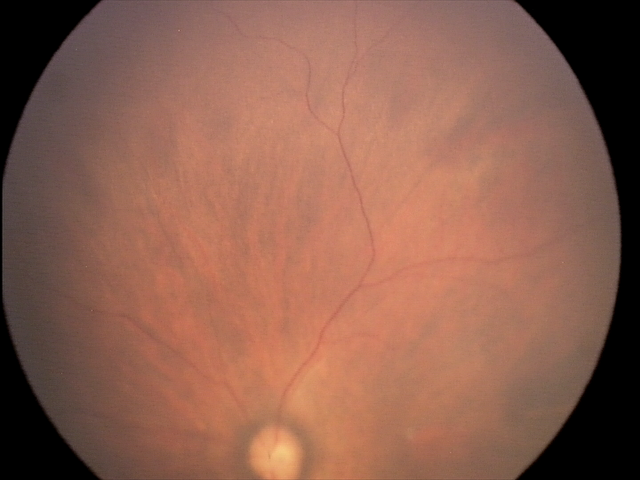

In [4]:
img

In [10]:
img = np.asarray(img)

In [11]:
img.shape

(480, 640, 3)

In [12]:
h,w = img.shape[:2]

In [13]:
h

480

In [16]:
w

640

In [17]:
h * 0.05

24.0

In [18]:
img2 = np.copy(img)

In [34]:
img2 = np.copy(img)
p = 0.05
left_top_sum = np.sum(img2[0:int(h*p), 0:int(w*p)])
right_bottom_sum = np.sum(img2[int(h*(1 - p)):h, int(w*(1 - p)):w])
right_top_sum = np.sum(img2[0:int(h*p), int(w*(1 - p)):w])
left_bottom_sum = np.sum(img2[int(h*(1 - p)):h, 0:int(w*p)])
print(left_bottom_sum + left_top_sum + right_bottom_sum + right_top_sum)

2


In [44]:
np.sum(img2[0:int(h*p), 0:int(w*p)])

0

In [42]:
np.where(img2[0:int(h*p), int(w*(1 - p)):w] != 0)

(array([16, 16], dtype=int64),
 array([20, 24], dtype=int64),
 array([2, 2], dtype=int64))

In [20]:
%matplotlib inline
from matplotlib import pyplot as plt

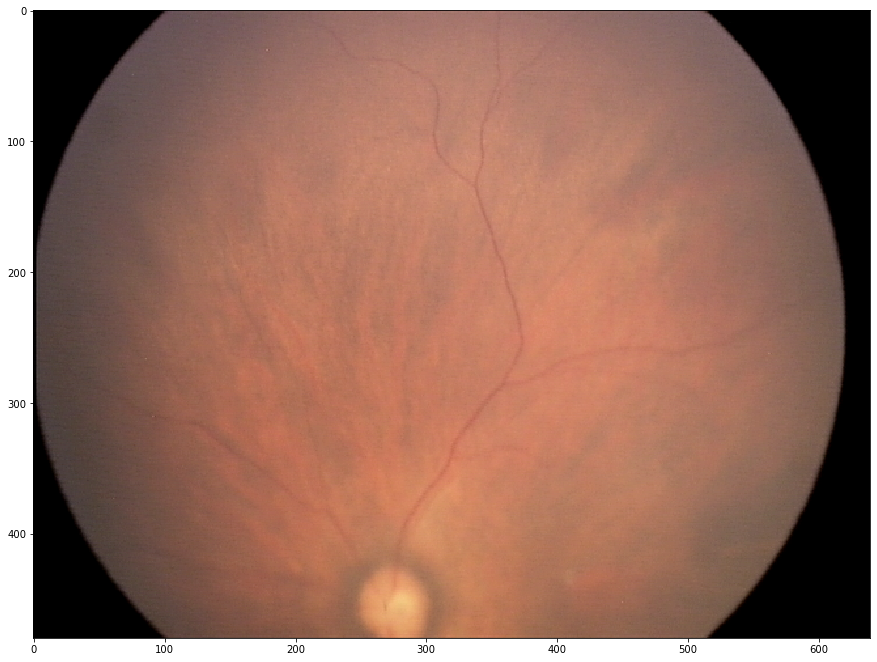

In [43]:
plt.figure(figsize=(15, 15))
plt.imshow(img2)

In [25]:
img2 = np.copy(img)
np.sum(img2[0:int(h*0.05), 0:int(w*0.05)])

0

In [45]:
import pandas as pd

In [64]:
df = pd.read_csv('neoDataSet1/metadata/set1EyeLabels.csv', header=None, names=['image_name', 'label'], index_col=0)

In [65]:
df

,label
image_name,
00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_0.png,OD
00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_1.png,OD
00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_10.png,OS
00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_11.png,OS
00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_2.png,OD
...,...
c4f179cd-28fb-4370-9540-1f02c11cc6be_5.png,OD
c4f179cd-28fb-4370-9540-1f02c11cc6be_6.png,OS
c4f179cd-28fb-4370-9540-1f02c11cc6be_7.png,OS


In [50]:
from glob import glob

In [52]:
for file in glob('../../neo/*.png'):
    file_name = file.replace('\\', '/').split('/')[-1]
    print(file_name)

00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_0.png
00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_1.png
00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_10.png
00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_11.png
00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_2.png
00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_3.png
00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_4.png
00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_5.png
00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_6.png
00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_7.png
00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_8.png
00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_9.png
0a686001-c6c0-4361-98ca-671b2830b3ff_0.png
0a686001-c6c0-4361-98ca-671b2830b3ff_1.png
0a686001-c6c0-4361-98ca-671b2830b3ff_10.png
0a686001-c6c0-4361-98ca-671b2830b3ff_11.png
0a686001-c6c0-4361-98ca-671b2830b3ff_12.png
0a686001-c6c0-4361-98ca-671b2830b3ff_2.png
0a686001-c6c0-4361-98ca-671b2830b3ff_3.png
0a686001-c6c0-4361-98ca-671b2830b3ff_4.png
0a686001-c6c0-4361-98ca-671b2830b3ff_5.png
0a686001-c6c0-4361-98ca-671b2830b3ff_6.png
0a686001-c6c0-4361-98ca-671b2830b3ff_7.png
0a6860

In [95]:
df = pd.read_csv('temt.csv', names=['image_name', 'label'], index_col=0)
if 'ACE' not in df.index:
    df = df.append(pd.Series(data=['OS'], index=['label'], name='ACE'))
df.to_csv('temt.csv', header=False)

In [76]:
df = df.append(pd.Series(data=['OS'], index=['label'], name='ACE'))

In [91]:
df

,label
image_name,
image_name,label
image_name,label
image_name,label
image_name,label
00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_0.png,OD
...,...
c4f179cd-28fb-4370-9540-1f02c11cc6be_8.png,OS
c4f179cd-28fb-4370-9540-1f02c11cc6be_9.png,OS
ACE,OS


In [78]:
df.to_csv('temt.csv')

In [82]:
'ACE' in df.keys()

False

In [87]:
df.index

Index(['image_name', 'image_name',
       '00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_0.png',
       '00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_1.png',
       '00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_10.png',
       '00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_11.png',
       '00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_2.png',
       '00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_3.png',
       '00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_4.png',
       '00a09af8-6a9f-4a82-bb4d-da8bfd34afbc_5.png',
       ...
       'c4f179cd-28fb-4370-9540-1f02c11cc6be_3.png',
       'c4f179cd-28fb-4370-9540-1f02c11cc6be_4.png',
       'c4f179cd-28fb-4370-9540-1f02c11cc6be_5.png',
       'c4f179cd-28fb-4370-9540-1f02c11cc6be_6.png',
       'c4f179cd-28fb-4370-9540-1f02c11cc6be_7.png',
       'c4f179cd-28fb-4370-9540-1f02c11cc6be_8.png',
       'c4f179cd-28fb-4370-9540-1f02c11cc6be_9.png', 'ACE', 'ACE', 'ACE'],
      dtype='object', name='image_name', length=1331)

In [96]:
l = [i for i in range(10)]

In [97]:
l

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [98]:
l.extend([53,623, 234])

In [99]:
l

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 53, 623, 234]

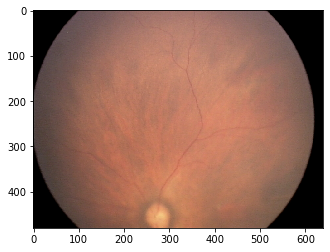

In [101]:
plt.imshow(img)

In [102]:
img.shape

(480, 640, 3)

In [104]:
import cv2

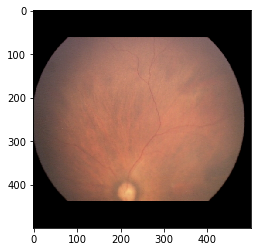

In [123]:
im = np.copy(img)
target_shape = (500, 500)
if im.shape[0] > im.shape[1]:
    h, w = target_shape[0], int(im.shape[1] * target_shape[1] / im.shape[0])
else:
    h, w = int(im.shape[0] * target_shape[0] / im.shape[1]), target_shape[1]
im = cv2.resize(im, (w, h))
if h != target_shape[0]:
    t = np.zeros((target_shape[0]//2 - h//2, target_shape[1], 3), dtype=np.uint8)
    im = np.concatenate([t, im, t], axis=0)
if w != target_shape[1]:
    t = np.zeros((target_shape[0], target_shape[0]//2 - w//2, 3), dtype=np.uint8)
    im = np.concatenate([t, im, t], axis=1)
plt.imshow(im[:500, :500])

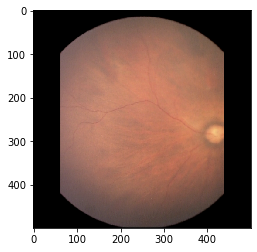

In [120]:
plt.imshow(im[:500, :500])

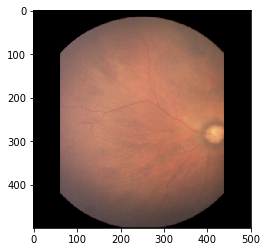

In [117]:
plt.imshow(np.rot90(im))